In [72]:
# Dependencies
import requests
import json
from citipy import citipy
import numpy as np
from api_keys import api_key
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import datetime as dt

csv_save = "output_data/cities.csv"
lat_range = (-90, 90)
lng_range = (-180, 180)

In [73]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [74]:
response = requests.get(url)

print(response.url)


http://api.openweathermap.org/data/2.5/weather


In [75]:
cities = []
lat_lngs = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)


589

In [76]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

count = 1

print(f"Beginning Data Retrieval")   
print("-"*60)

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        print(f"Processing Record {count} | {city}") 
        
        count += 1
   
    except:
        print(f"City not found. Skipping...")
        continue
print("-"*60)
print(f"Data Retrieval Complete")   
print("-"*60)


Beginning Data Retrieval
------------------------------------------------------------
Processing Record 1 | albany
Processing Record 2 | kapaa
Processing Record 3 | roald
Processing Record 4 | iqaluit
Processing Record 5 | zhigansk
Processing Record 6 | huangnihe
Processing Record 7 | jalu
Processing Record 8 | vicuna
Processing Record 9 | haines junction
Processing Record 10 | hithadhoo
Processing Record 11 | vaini
Processing Record 12 | hermanus
Processing Record 13 | provideniya
City not found. Skipping...
Processing Record 14 | torbay
Processing Record 15 | busselton
Processing Record 16 | sechura
Processing Record 17 | mangrol
Processing Record 18 | taltal
Processing Record 19 | bud
Processing Record 20 | victoria
Processing Record 21 | petropavlovsk-kamchatskiy
Processing Record 22 | helong
Processing Record 23 | cidreira
Processing Record 24 | huarmey
Processing Record 25 | jurado
Processing Record 26 | faanui
Processing Record 27 | sahaspur
Processing Record 28 | hilo
Processin

Processing Record 236 | constitucion
Processing Record 237 | langham
Processing Record 238 | fortuna
Processing Record 239 | porto belo
Processing Record 240 | beba
Processing Record 241 | sistranda
City not found. Skipping...
Processing Record 242 | lievin
Processing Record 243 | mildura
Processing Record 244 | viota
Processing Record 245 | kyabram
Processing Record 246 | narasannapeta
Processing Record 247 | abakan
Processing Record 248 | lavrentiya
Processing Record 249 | osakarovka
Processing Record 250 | kashi
Processing Record 251 | sitka
City not found. Skipping...
Processing Record 252 | pangnirtung
Processing Record 253 | lorengau
Processing Record 254 | kahului
Processing Record 255 | taoudenni
Processing Record 256 | peniche
Processing Record 257 | naze
City not found. Skipping...
Processing Record 258 | adrar
Processing Record 259 | vanimo
Processing Record 260 | ridge
Processing Record 261 | monrovia
Processing Record 262 | pierre
Processing Record 263 | poum
Processing Re

Processing Record 465 | eslamshahr
Processing Record 466 | chikwawa
Processing Record 467 | camacha
Processing Record 468 | mehamn
Processing Record 469 | zanjan
Processing Record 470 | nelson bay
Processing Record 471 | juarez
Processing Record 472 | sena madureira
Processing Record 473 | les cayes
Processing Record 474 | ventspils
Processing Record 475 | ust-omchug
Processing Record 476 | inhambane
Processing Record 477 | iquitos
Processing Record 478 | the valley
Processing Record 479 | agadez
Processing Record 480 | samarai
Processing Record 481 | guatire
Processing Record 482 | xining
Processing Record 483 | basco
Processing Record 484 | thunder bay
Processing Record 485 | itarema
Processing Record 486 | alghero
Processing Record 487 | severnyy
Processing Record 488 | erenhot
Processing Record 489 | mancio lima
Processing Record 490 | egvekinot
Processing Record 491 | akyab
Processing Record 492 | ishigaki
Processing Record 493 | rio verde de mato grosso
City not found. Skipping..

In [77]:
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create df 
weather_data = pd.DataFrame(weather_dict)

# Display count
weather_data.count()


City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

In [78]:
weather_data.to_csv('output_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Albany,40,US,1619964317,44,42.6001,-73.9662,60.80,5.75
1,Kapaa,90,US,1619964545,88,22.0752,-159.3190,73.40,16.11
2,Roald,0,NO,1619964545,57,62.5833,6.1333,46.40,14.97
3,Iqaluit,90,CA,1619964546,70,63.7506,-68.5145,37.40,14.97
4,Zhigansk,100,RU,1619964546,99,66.7697,123.3711,32.04,4.47


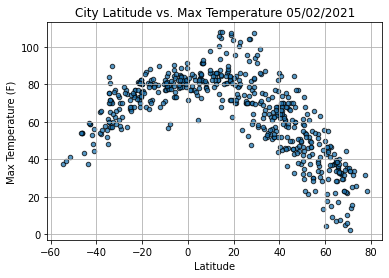

In [79]:
date = dt.date.today().strftime("%m/%d/%Y")

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Max Temperature.png")
plt.show()

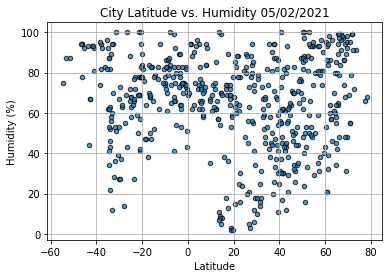

In [80]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Humidity.png")
plt.show()

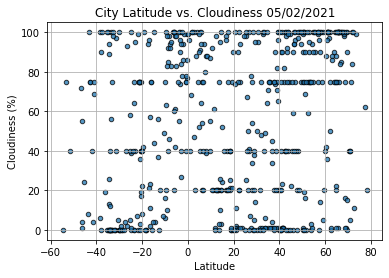

In [81]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Cloudiness.png")
plt.show()

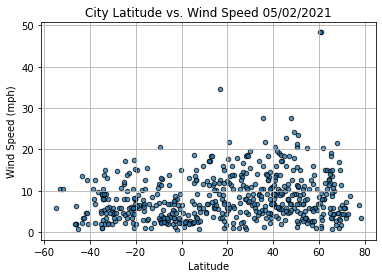

In [82]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=20,alpha=.75, edgecolors="k")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs Wind Speed.png")
plt.show()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [83]:
weather_data["Humidity"].value_counts()
print( f"There are no cities with humidity above 100%")

There are no cities with humidity above 100%


In [84]:
north_hemi_df = weather_data.loc[(weather_data['Lat']>0)]
south_hemi_df = weather_data.loc[(weather_data['Lat']<0)]

In [85]:
south_hemi_df.count()

City          176
Cloudiness    176
Country       176
Date          176
Humidity      176
Lat           176
Lng           176
Max Temp      176
Wind Speed    176
dtype: int64

In [86]:
north_hemi_df.count()

City          365
Cloudiness    365
Country       365
Date          365
Humidity      365
Lat           365
Lng           365
Max Temp      365
Wind Speed    365
dtype: int64

In [87]:
from scipy.stats import linregress
def line_regr(x, y,yaxis):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    y_pred = intercept + slope*x
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x,y)
    plt.plot(x,y_pred,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(yaxis)
    print(f"r-squared: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.8378892552588315


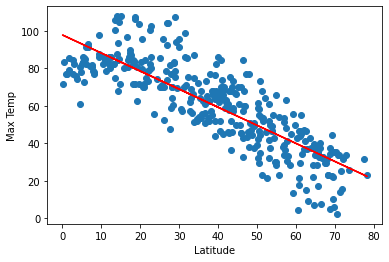

<Figure size 432x288 with 0 Axes>

In [88]:
x = north_hemi_df['Lat']
y = north_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("reg_north_temp_vs_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.7696516033340584


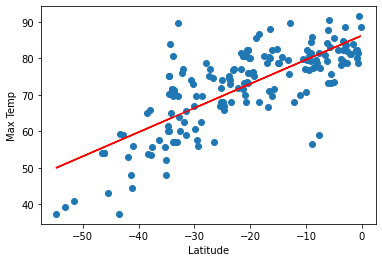

<Figure size 432x288 with 0 Axes>

In [89]:
x = south_hemi_df['Lat']
y = south_hemi_df['Max Temp']
line_regr(x,y,'Max Temp')

plt.savefig("reg_south_temp_vs_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.13058850772523


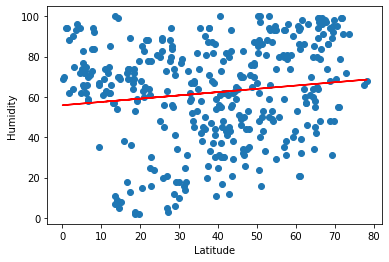

<Figure size 432x288 with 0 Axes>

In [90]:
x = north_hemi_df['Lat']
y = north_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("reg_north_hum_vs_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.04082232126982614


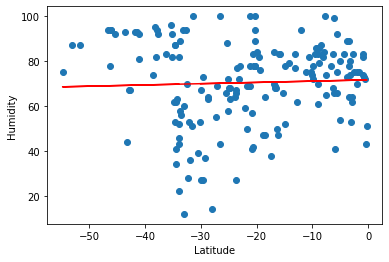

<Figure size 432x288 with 0 Axes>

In [91]:
x = south_hemi_df['Lat']
y = south_hemi_df['Humidity']
line_regr(x,y,'Humidity')

plt.savefig("reg_south_hum_vs_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.18423897915618592


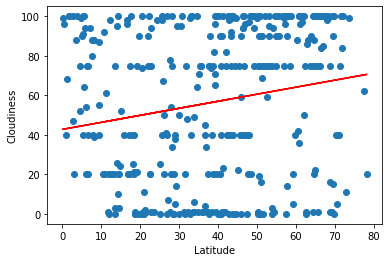

<Figure size 432x288 with 0 Axes>

In [92]:
x = north_hemi_df['Lat']
y = north_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("reg_north_cloud_vs_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.3374428894163963


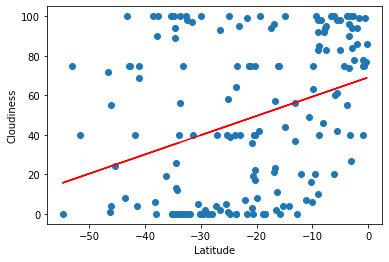

<Figure size 432x288 with 0 Axes>

In [93]:
x = south_hemi_df['Lat']
y = south_hemi_df['Cloudiness']
line_regr(x,y,'Cloudiness')

plt.savefig("reg_south_cloud_vs_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.03349163865133601


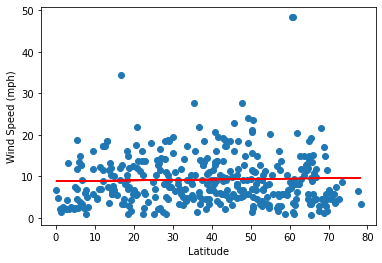

<Figure size 432x288 with 0 Axes>

In [94]:
x = north_hemi_df['Lat']
y = north_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("reg_north_wind_vs_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.0461252302688333


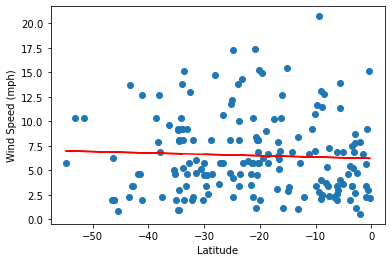

<Figure size 432x288 with 0 Axes>

In [95]:
x = south_hemi_df['Lat']
y = south_hemi_df['Wind Speed']
line_regr(x,y,'Wind Speed (mph)')

plt.savefig("reg_south_wind_vs_lat.png")